In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
remark_data=pd.read_csv('remark_data.csv')

In [3]:
remark_data.head()

,remark
0,byr arisan januari
1,arisan barang
2,etoll cfhro
3,belanja muse 12mar
4,ruko 2


For this dataset actually we can gain the insight for instance seeing what kind of 
transaction usually done by customer by seeing the distribution of most common word 
occurred from the data.
Here‟s I plot the top 30 common words usually occurred which can describe the 
transaction of customers.

In [4]:
from collections import Counter
Counter("".join(remark_data.remark).split()).most_common(30)

[('arisan', 736),
 ('bayar', 520),
 ('gaji', 464),
 ('uang', 343),
 ('thr', 312),
 ('fee', 262),
 ('cicilan', 238),
 ('mei', 230),
 ('kos', 215),
 ('jajan', 213),
 ('2022', 195),
 ('belanja', 194),
 ('dan', 194),
 ('ongkir', 182),
 ('infaq', 168),
 ('nabung', 165),
 ('rumah', 163),
 ('utang', 158),
 ('22', 149),
 ('maret', 146),
 ('cod', 145),
 ('juni', 142),
 ('tabungan', 142),
 ('2', 141),
 ('april', 138),
 ('cell', 136),
 ('kue', 134),
 ('paket', 131),
 ('laundry', 130),
 ('angsuran', 129)]

In [5]:
frekuensi_20=pd.DataFrame(Counter("".join(remark_data.remark).split()).most_common(20))
frekuensi_20 #20 most common transactions

,0,1
0,arisan,736
1,bayar,520
2,gaji,464
3,uang,343
4,thr,312
5,fee,262
6,cicilan,238
7,mei,230
8,kos,215
9,jajan,213


In [6]:
frekuensi=pd.DataFrame(Counter("".join(remark_data.remark).split()).most_common(50))
frekuensi #50 most common transactions

,0,1
0,arisan,736
1,bayar,520
2,gaji,464
3,uang,343
4,thr,312
5,fee,262
6,cicilan,238
7,mei,230
8,kos,215
9,jajan,213


In [7]:
frekuensi=pd.DataFrame(Counter("".join(remark_data.remark).split()).most_common())
frekuensi.to_csv('frekuensi.csv', index=False) #we save the amounts of 50 most common transactions to csv file

In [ ]:
frekuensi.tail(30)

Text(0.5, 0, 'token occurence')

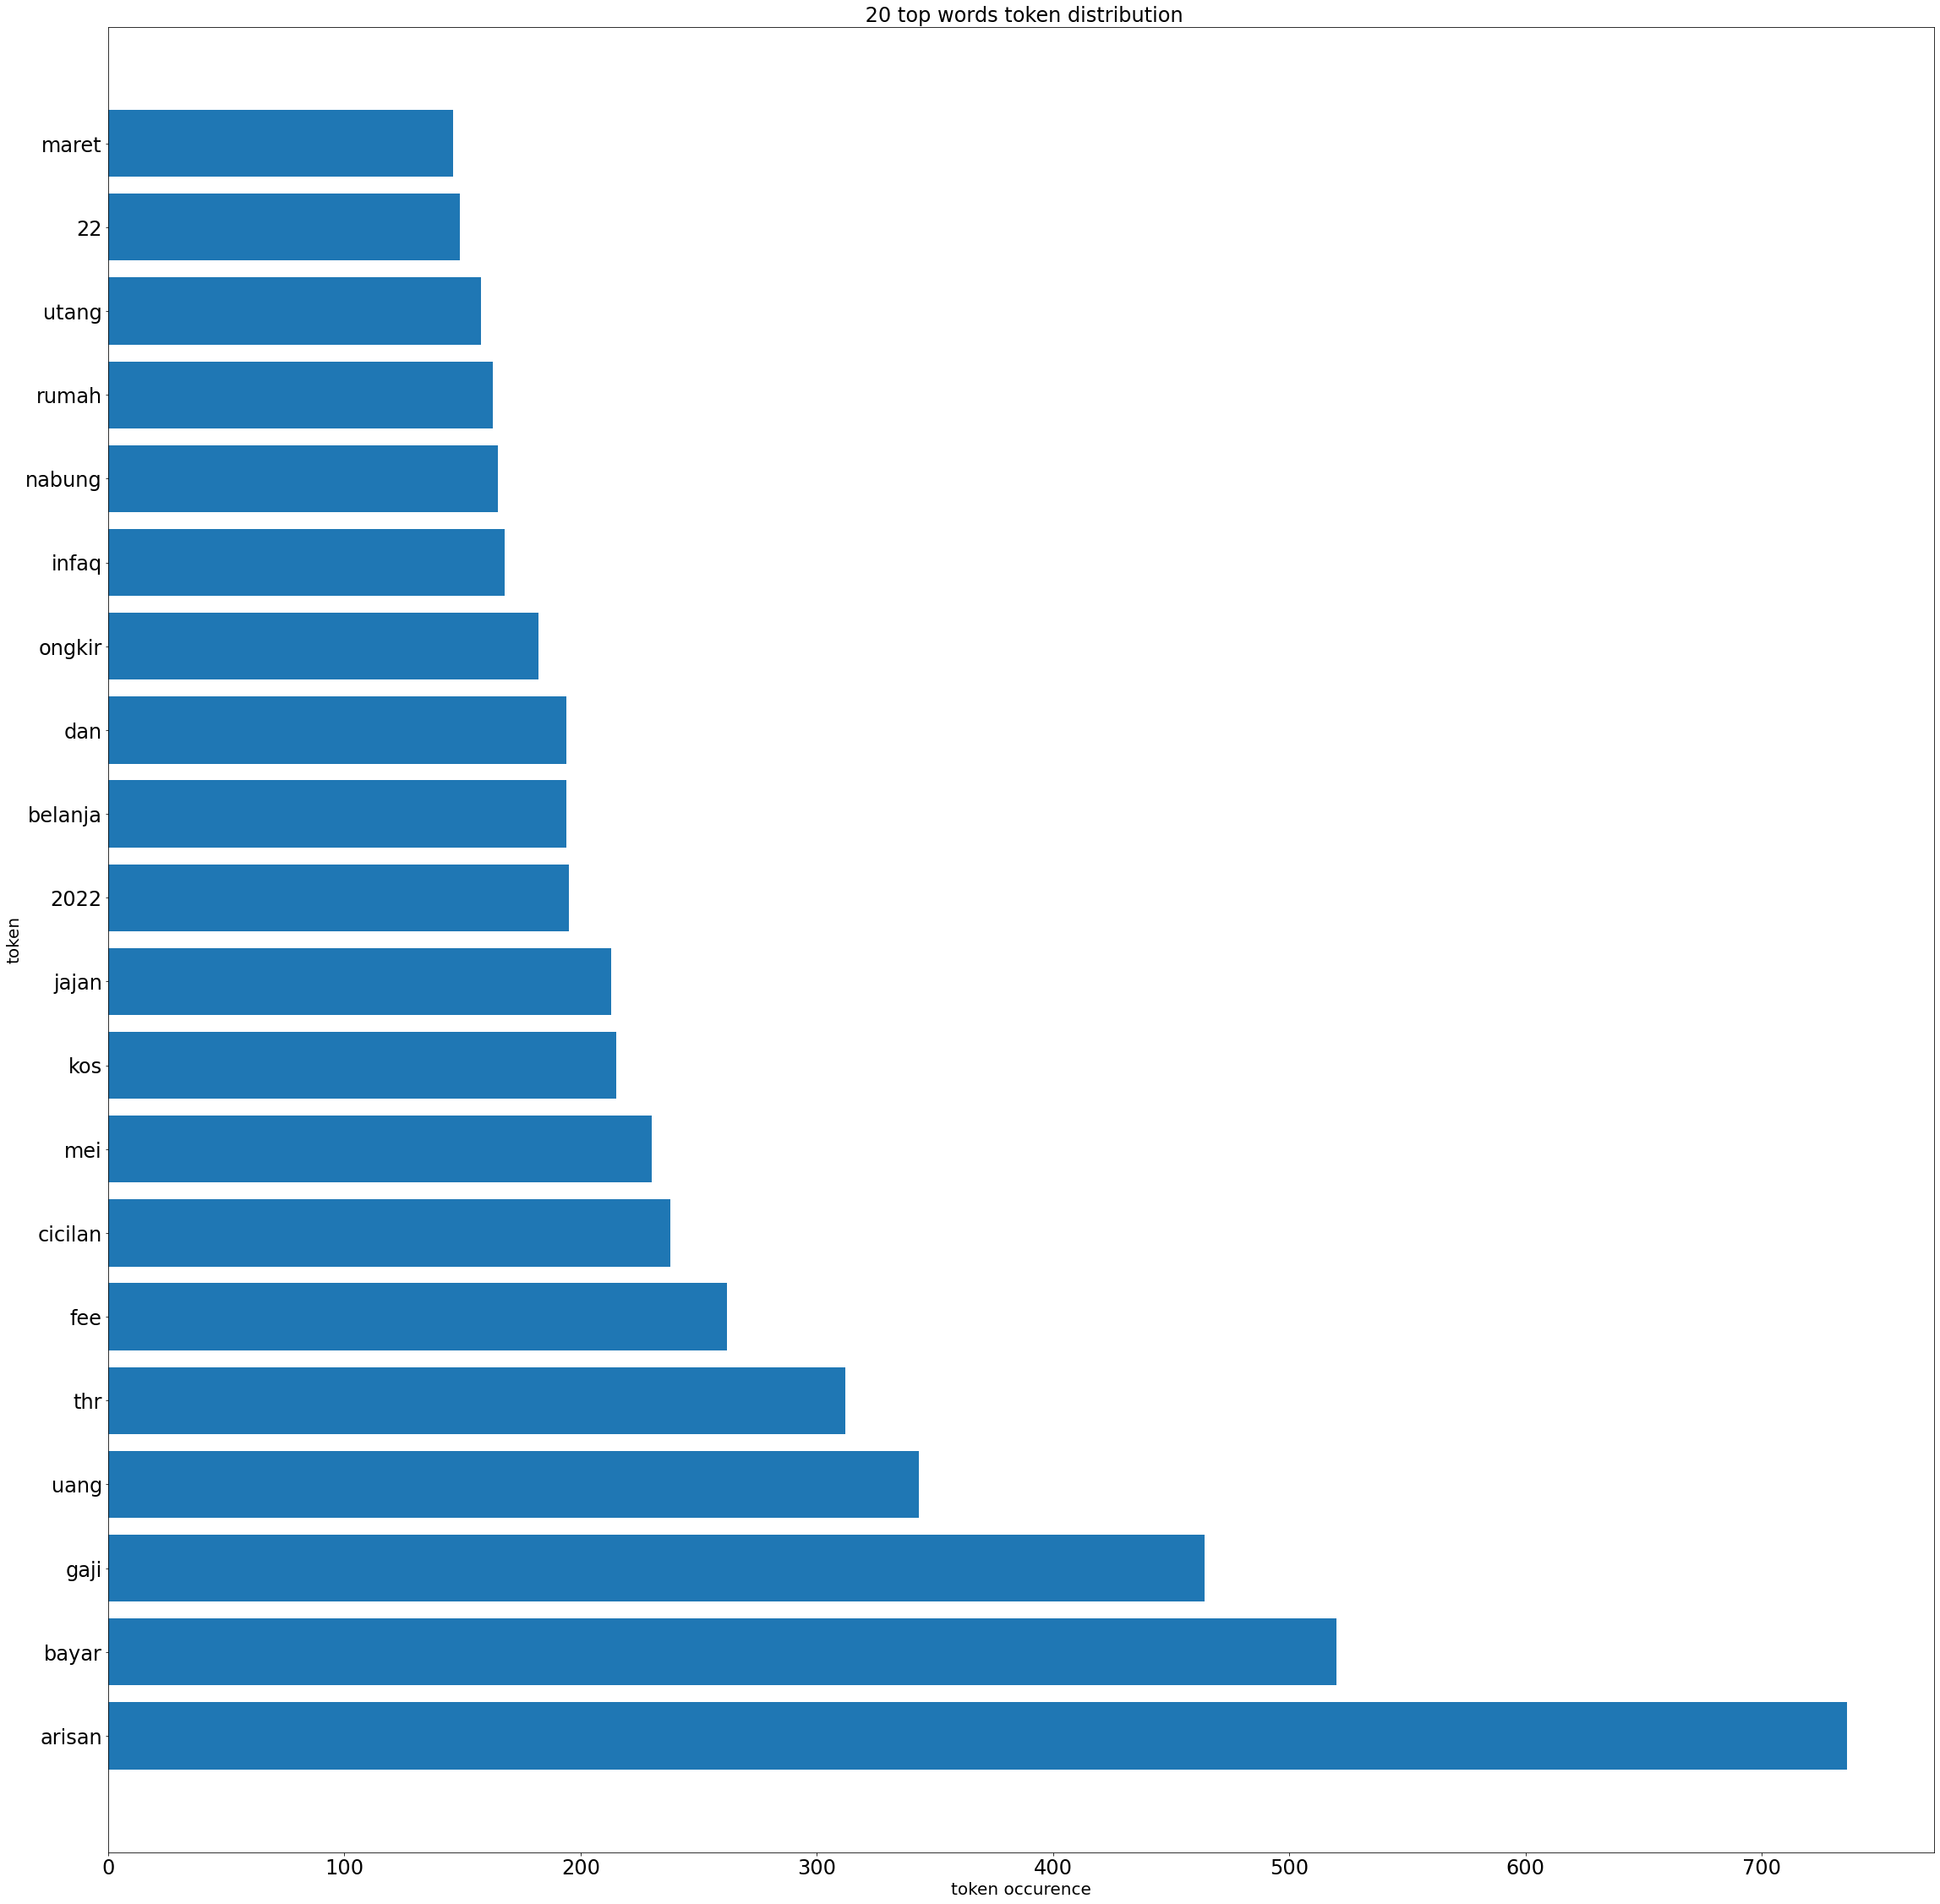

In [24]:
#let's plot the 20 top token (most common transactions) distribution

fig= plt.figure(figsize=(30,30))
ax= fig.add_axes([0,0,1,1])
hztal= frekuensi_20[0]
vrtkal= frekuensi_20[1]
ax.barh(hztal,vrtkal)
plt.title(" 20 top words token distribution", fontsize=24)
plt.ylabel("token", fontsize=20)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.xlabel("token occurence", fontsize=20)

From the plot above, we can assume that paying for “arisan” is the most common 
transaction that usually done by costumers. I only pick the very spesific transaction to 
make classification easier. So, from top 20 arisan, gaji, thr, fee, cicilan , kos, and jajan
are the most spesific and common transaction purpose from custumer who did transaction 
using the app. So, for broader specification I add 10 more top category transaction, for 
this time I display it on table. As we can see on Table above.

Well, actually business insights that we obtain is the purpose of transaction that have been done 
by customers. So, from the insights we obtained, we can maximize the service for loyal 
customers who periodically do the transaction based on their transaction remarks. For instance 
giving some rewards or free application fee or stuffs to keep our customers being loyal and 
satisfied. In my opinion we can give some rewards like points for customers who always use the 
application to pay for arisan, gaji, thr, fee, cicilan , kos, and jajan for instances. And we can 
do more advertisement to people who do the least transaction based on their remark transaction 
history. Here‟s in Table 2 are shown the 30 least common transaction remarks by the costumers. 
As we can see that make the not common in transaction remarks, because of the word they use 
either an abbriviation, or name, or terminology. But this is can be an insight too, we have to 
carefully define the kind of transaction if we look at the remark. This is not only to maximize the 
effectiveness of transaction classification but also to prevent from the possibility of crime based 
on suspicious remarks. 

# Prediction (NLP)

Moreover, not only identifying the type of transaction that have been done by customers, but 
actually we can also make a prediction or classification based on remarks of transaction that have 
been done by customers. This aims to predict what kind of transaction that will be done by a 
costumer based on their transaction remarks history. So, I apply the Naïve Bayes classification to 
predict the transaction based on the remarks. Still using the same remarks.csv dataset, the 
algorithm classified the keywords of the remark transaction, and I split the dataset to be 80% of 
training set and 20% of testing set. To be noted, this is still kinnd of data modelling, so we need 
more data to make the prediction get better accuracy.
From the prediction, we obtain : (I only display the top 25 data from the dataset)

In [30]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 9746):
  remark = re.sub('[^a-zA-Z]', ' ', remark_data['remark'][i])
  remark = remark.lower()
  remark = remark.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  remark = [ps.stem(word) for word in remark if not word in set(all_stopwords)]
  remark= ' '.join(remark)
  corpus.append(remark)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 9746)
X = cv.fit_transform(corpus).toarray()
y = remark_data.iloc[:, -1].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[' reward ' ' reward modul smt 2 ']
 [' ayam ' ' ayam ']
 [' kos juni ' ' kos cia juni 2022 ']
 ...
 [' paket ' ' paket isoman ']
 [' reimburse ' ' reimburse ']
 [' pelunasan 3 order ' ' pelunasan order ']]


As we can see from the table, the algorithm predict the keywords, so the result of the prediction 
is the keywords of the actual remarks. The prediction is useful in developing application to make 
customers easier in using the app, for instance creating the autotext based on remarks history and 
so on. But we obtain the low accuracy score for this whole dataset, namely just 0.25. This is most 
likely to happen because we need more data to train our algorithm to classify and we have to 
deal with some unidentified words too. But based on sample remarks prediction from the result of prediction. in 
my opinion, we have obtained and we can obtained more promising result. 